# Chinook Dataset

In [1]:
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to the SQLite database file
db_path = 'Chinook_Sqlite.sqlite'

# Connect to the database
conn = sqlite3.connect(db_path)

# Helper function to run SQL queries
def run_query(query):
    return pd.read_sql_query(query, conn)

In [3]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = run_query(query)
print("Available tables in the Chinook Database:")
print(tables)

Available tables in the Chinook Database:
             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


In [4]:
query = "PRAGMA table_info(Album);"
album_schema = run_query(query)
print("\nSchema for the 'Album' table:")
print(album_schema)


Schema for the 'Album' table:
   cid      name           type  notnull dflt_value  pk
0    0   AlbumId        INTEGER        1       None   1
1    1     Title  NVARCHAR(160)        1       None   0
2    2  ArtistId        INTEGER        1       None   0


In [5]:
query = "SELECT * FROM Album LIMIT 5;"
album_sample = run_query(query)
print("\nSample data from the 'Album' table:")
print(album_sample)


Sample data from the 'Album' table:
   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3


In [6]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = run_query(query)
print(tables)

             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


In [7]:
# Start Exploring Relationships

In [8]:
# Explore Relationships: Sample Queries

# 1. Top 5 most popular genres by track count
query = """
SELECT g.Name AS Genre, COUNT(t.TrackId) AS TrackCount
FROM Genre g
JOIN Track t ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY TrackCount DESC
LIMIT 5;
"""
popular_genres = run_query(query)
print("\nTop 5 Most Popular Genres:")
print(popular_genres)



Top 5 Most Popular Genres:
                Genre  TrackCount
0                Rock        1297
1               Latin         579
2               Metal         374
3  Alternative & Punk         332
4                Jazz         130


In [9]:
# 2. Total sales by country
query = """
SELECT c.Country, SUM(il.UnitPrice * il.Quantity) AS TotalSales
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
JOIN InvoiceLine il ON i.InvoiceId = il.InvoiceId
GROUP BY c.Country
ORDER BY TotalSales DESC;
"""
sales_by_country = run_query(query)
print("\nTotal Sales by Country:")
print(sales_by_country)


Total Sales by Country:
           Country  TotalSales
0              USA      523.06
1           Canada      303.96
2           France      195.10
3           Brazil      190.10
4          Germany      156.48
5   United Kingdom      112.86
6   Czech Republic       90.24
7         Portugal       77.24
8            India       75.26
9            Chile       46.62
10         Ireland       45.62
11         Hungary       45.62
12         Austria       42.62
13         Finland       41.62
14     Netherlands       40.62
15          Norway       39.62
16          Sweden       38.62
17           Spain       37.62
18          Poland       37.62
19           Italy       37.62
20         Denmark       37.62
21         Belgium       37.62
22       Australia       37.62
23       Argentina       37.62


In [10]:
# 3. Top customers by total purchases
query = """
SELECT c.FirstName || ' ' || c.LastName AS CustomerName, SUM(il.UnitPrice * il.Quantity) AS TotalPurchases
FROM Customer c
JOIN Invoice i ON c.CustomerId = i.CustomerId
JOIN InvoiceLine il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalPurchases DESC
LIMIT 10;
"""
top_customers = run_query(query)
print("\nTop 10 Customers by Total Purchases:")
print(top_customers)


Top 10 Customers by Total Purchases:
         CustomerName  TotalPurchases
0         Helena Holý           49.62
1  Richard Cunningham           47.62
2          Luis Rojas           46.62
3       Hugh O'Reilly           45.62
4     Ladislav Kovács           45.62
5     Fynn Zimmermann           43.62
6       Julia Barnett           43.62
7       Frank Ralston           43.62
8      Victor Stevens           42.62
9       Astrid Gruber           42.62


In [11]:
# 4. Sales per employee who facilitated the transaction
query = """
SELECT e.FirstName || ' ' || e.LastName AS EmployeeName, SUM(il.UnitPrice * il.Quantity) AS TotalSales
FROM Employee e
JOIN Customer c ON e.EmployeeId = c.SupportRepId
JOIN Invoice i ON c.CustomerId = i.CustomerId
JOIN InvoiceLine il ON i.InvoiceId = il.InvoiceId
GROUP BY e.EmployeeId
ORDER BY TotalSales DESC;
"""
sales_per_employee = run_query(query)
print("\nSales Per Employee:")
print(sales_per_employee)


Sales Per Employee:
    EmployeeName  TotalSales
0   Jane Peacock      833.04
1  Margaret Park      775.40
2  Steve Johnson      720.16


In [12]:
# 5. Albums with the highest number of tracks
query = """
SELECT al.Title AS AlbumTitle, COUNT(t.TrackId) AS TrackCount
FROM Album al
JOIN Track t ON al.AlbumId = t.AlbumId
GROUP BY al.AlbumId
ORDER BY TrackCount DESC
LIMIT 5;
"""
albums_with_most_tracks = run_query(query)
print("\nAlbums with the Highest Number of Tracks:")
print(albums_with_most_tracks)


Albums with the Highest Number of Tracks:
       AlbumTitle  TrackCount
0   Greatest Hits          57
1  Minha Historia          34
2       Unplugged          30
3  Lost, Season 3          26
4  Lost, Season 1          25


C:\Users\milto\AppData\Local\Temp\ipykernel_16000\935104853.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='Genre', data=sales_by_genre, palette='viridis')


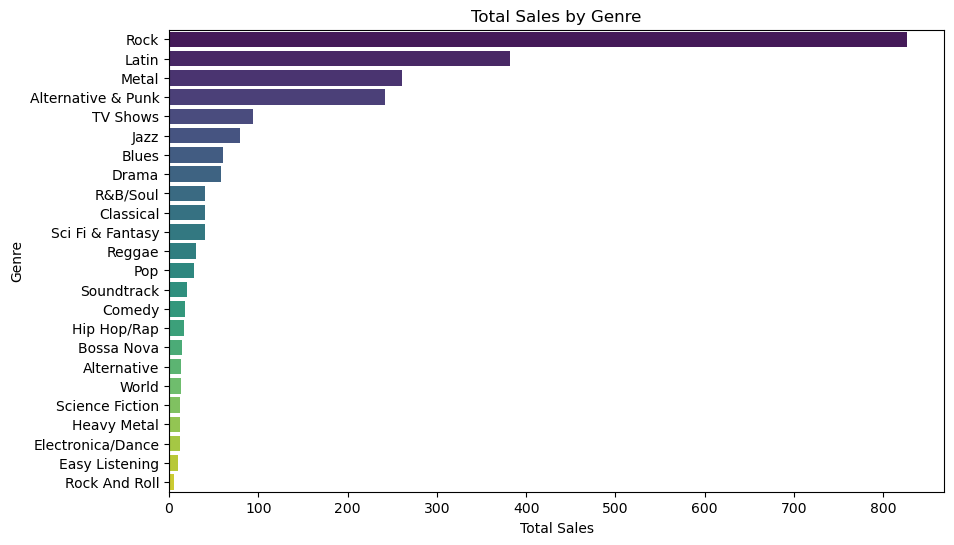

In [13]:
# Visualization: Sales by Genre
query = """
SELECT g.Name AS Genre, SUM(il.UnitPrice * il.Quantity) AS TotalSales
FROM Genre g
JOIN Track t ON g.GenreId = t.GenreId
JOIN InvoiceLine il ON t.TrackId = il.TrackId
GROUP BY g.Name
ORDER BY TotalSales DESC;
"""
sales_by_genre = run_query(query)

# Plot sales by genre
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='Genre', data=sales_by_genre, palette='viridis')
plt.title('Total Sales by Genre')
plt.xlabel('Total Sales')
plt.ylabel('Genre')
plt.show()

In [14]:
# Close the database connection
conn.close()